In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
dataset = dataset.dropna()

In [5]:
# delete [Origin] column & and new 3 columns to dataframe which are ['USA', 'Europe', 'Japan'] --> one_hot_Encoder

origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [6]:
# split data to train & test manually without sklearn:

x_train = dataset.sample(frac=0.8,random_state=0)
x_test = dataset.drop(x_train.index)

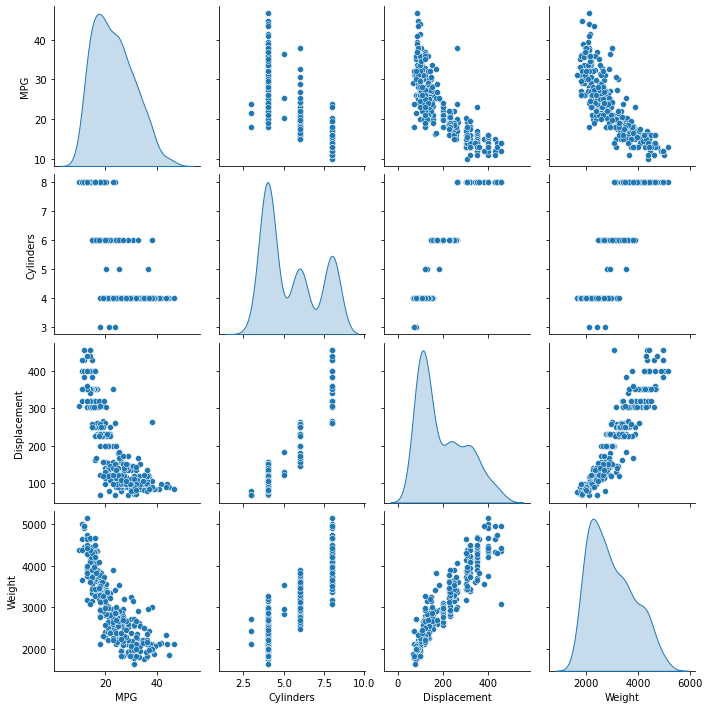

In [7]:
sns.pairplot(x_train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [8]:
train_stats = x_train.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [9]:
y_train = x_train.pop('MPG')
y_test = x_test.pop('MPG')

In [10]:
print(y_train)

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64


In [11]:
print(y_test)

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64


In [12]:
# normalize data:

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_x_train = norm(x_train)
normed_x_test = norm(x_test)

In [13]:
normed_x_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [14]:
normed_x_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.465148,-0.495225
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,-0.465148,2.012852
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.465148,-0.495225
...,...,...,...,...,...,...,...,...,...
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,0.774676,-0.465148,-0.495225
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,-1.286751,2.143005,-0.495225
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,-1.286751,-0.465148,2.012852
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,-1.286751,-0.465148,2.012852


In [15]:
from tensorflow.keras.layers import Dense
                                                                               # here i not make flatten because i use numbers data [structure data] not image(2D) data, so i not need to do Flatten layer because data already has Flattened
def build_model():                                                             # here the last Danse layer is (1) only that's mean it is Regression model not binary or multi classification 
    model = keras.Sequential([                                                 # here i used [RMSprop optimizer] & [mean_squared_error Loss] beacuse it is Regression model
        Dense(64, activation=tf.nn.relu, input_shape=[len(x_train.columns)]),
        Dense(64, activation=tf.nn.relu),
        Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(lr = 0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error'])
    
    return model

In [16]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


C:\Users\nooor\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
# create Mini Batch by hand:

example_batch = normed_x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.22431439],
       [-0.02250103],
       [-0.38976043],
       [ 0.1860156 ],
       [ 0.31124312],
       [-0.23507658],
       [ 0.27604783],
       [-0.04989737],
       [-0.15911926],
       [ 0.03408493]], dtype=float32)

In [18]:
history = model.fit(normed_x_train, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
8/8 [==============================] - 2s 58ms/step - loss: 563.5260 - mean_absolute_error: 22.5540 - mean_squared_error: 563.5260 - val_loss: 550.8813 - val_mean_absolute_error: 22.2601 - val_mean_squared_error: 550.8813
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 509.4544 - mean_absolute_error: 21.3604 - mean_squared_error: 509.4544 - val_loss: 495.2999 - val_mean_absolute_error: 21.0279 - val_mean_squared_error: 495.2999
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 455.6373 - mean_absolute_error: 20.1349 - mean_squared_error: 455.6373 - val_loss: 432.9642 - val_mean_absolute_error: 19.5852 - val_mean_squared_error: 432.9642
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 398.0721 - mean_absolute_error: 18.7523 - mean_squared_error: 398.0721 - val_loss: 370.1664 - val_mean_absolute_error: 18.0096 - val_mean_squared_error: 370.1664
Epoch 5/1000
8/8 [==============================] - 0s 16ms/s

8/8 [==============================] - 0s 11ms/step - loss: 6.4664 - mean_absolute_error: 1.7904 - mean_squared_error: 6.4664 - val_loss: 8.3990 - val_mean_absolute_error: 2.1659 - val_mean_squared_error: 8.3990
Epoch 73/1000
8/8 [==============================] - 0s 14ms/step - loss: 6.3350 - mean_absolute_error: 1.7857 - mean_squared_error: 6.3350 - val_loss: 8.7122 - val_mean_absolute_error: 2.1431 - val_mean_squared_error: 8.7122
Epoch 74/1000
8/8 [==============================] - 0s 12ms/step - loss: 6.1367 - mean_absolute_error: 1.7474 - mean_squared_error: 6.1367 - val_loss: 8.2478 - val_mean_absolute_error: 2.2381 - val_mean_squared_error: 8.2478
Epoch 75/1000
8/8 [==============================] - 0s 11ms/step - loss: 6.3442 - mean_absolute_error: 1.7674 - mean_squared_error: 6.3442 - val_loss: 8.2516 - val_mean_absolute_error: 2.1830 - val_mean_squared_error: 8.2516
Epoch 76/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.1739 - mean_absolute_error: 1.7651

8/8 [==============================] - 0s 10ms/step - loss: 5.6658 - mean_absolute_error: 1.6494 - mean_squared_error: 5.6658 - val_loss: 7.9282 - val_mean_absolute_error: 2.1873 - val_mean_squared_error: 7.9282
Epoch 145/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.4660 - mean_absolute_error: 1.6279 - mean_squared_error: 5.4660 - val_loss: 8.0340 - val_mean_absolute_error: 2.1618 - val_mean_squared_error: 8.0340
Epoch 146/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.5218 - mean_absolute_error: 1.6259 - mean_squared_error: 5.5218 - val_loss: 7.8874 - val_mean_absolute_error: 2.1538 - val_mean_squared_error: 7.8874
Epoch 147/1000
8/8 [==============================] - 0s 14ms/step - loss: 5.4635 - mean_absolute_error: 1.6115 - mean_squared_error: 5.4635 - val_loss: 8.0830 - val_mean_absolute_error: 2.2412 - val_mean_squared_error: 8.0830
Epoch 148/1000
8/8 [==============================] - 0s 16ms/step - loss: 5.6123 - mean_absolute_error: 1.65

8/8 [==============================] - 0s 12ms/step - loss: 5.0723 - mean_absolute_error: 1.5570 - mean_squared_error: 5.0723 - val_loss: 7.8733 - val_mean_absolute_error: 2.1411 - val_mean_squared_error: 7.8733
Epoch 217/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.2005 - mean_absolute_error: 1.5815 - mean_squared_error: 5.2005 - val_loss: 8.0949 - val_mean_absolute_error: 2.1067 - val_mean_squared_error: 8.0949
Epoch 218/1000
8/8 [==============================] - 0s 13ms/step - loss: 5.3244 - mean_absolute_error: 1.6053 - mean_squared_error: 5.3244 - val_loss: 8.3111 - val_mean_absolute_error: 2.2588 - val_mean_squared_error: 8.3111
Epoch 219/1000
8/8 [==============================] - 0s 17ms/step - loss: 5.2076 - mean_absolute_error: 1.5711 - mean_squared_error: 5.2076 - val_loss: 8.1561 - val_mean_absolute_error: 2.2077 - val_mean_squared_error: 8.1561
Epoch 220/1000
8/8 [==============================] - 0s 14ms/step - loss: 5.2752 - mean_absolute_error: 1.5

8/8 [==============================] - 0s 8ms/step - loss: 4.9496 - mean_absolute_error: 1.5153 - mean_squared_error: 4.9496 - val_loss: 8.3364 - val_mean_absolute_error: 2.1494 - val_mean_squared_error: 8.3364
Epoch 289/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.9738 - mean_absolute_error: 1.5212 - mean_squared_error: 4.9738 - val_loss: 8.2948 - val_mean_absolute_error: 2.1674 - val_mean_squared_error: 8.2948
Epoch 290/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.9220 - mean_absolute_error: 1.4988 - mean_squared_error: 4.9220 - val_loss: 8.2294 - val_mean_absolute_error: 2.1472 - val_mean_squared_error: 8.2294
Epoch 291/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9954 - mean_absolute_error: 1.5375 - mean_squared_error: 4.9954 - val_loss: 8.5068 - val_mean_absolute_error: 2.1641 - val_mean_squared_error: 8.5068
Epoch 292/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.9632 - mean_absolute_error: 1.5189

Epoch 360/1000
8/8 [==============================] - 0s 12ms/step - loss: 5.0004 - mean_absolute_error: 1.4668 - mean_squared_error: 5.0004 - val_loss: 8.2114 - val_mean_absolute_error: 2.1964 - val_mean_squared_error: 8.2114
Epoch 361/1000
8/8 [==============================] - 0s 14ms/step - loss: 4.7847 - mean_absolute_error: 1.4570 - mean_squared_error: 4.7847 - val_loss: 8.3042 - val_mean_absolute_error: 2.1829 - val_mean_squared_error: 8.3042
Epoch 362/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.6276 - mean_absolute_error: 1.4352 - mean_squared_error: 4.6276 - val_loss: 8.5337 - val_mean_absolute_error: 2.2069 - val_mean_squared_error: 8.5337
Epoch 363/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.5931 - mean_absolute_error: 1.4634 - mean_squared_error: 4.5931 - val_loss: 8.4827 - val_mean_absolute_error: 2.2743 - val_mean_squared_error: 8.4827
Epoch 364/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.6901 - mean_abs

8/8 [==============================] - 0s 14ms/step - loss: 4.3942 - mean_absolute_error: 1.4387 - mean_squared_error: 4.3942 - val_loss: 8.6060 - val_mean_absolute_error: 2.2619 - val_mean_squared_error: 8.6060
Epoch 433/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.5614 - mean_absolute_error: 1.4228 - mean_squared_error: 4.5614 - val_loss: 8.5431 - val_mean_absolute_error: 2.2523 - val_mean_squared_error: 8.5431
Epoch 434/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.4599 - mean_absolute_error: 1.4093 - mean_squared_error: 4.4599 - val_loss: 8.3876 - val_mean_absolute_error: 2.1881 - val_mean_squared_error: 8.3876
Epoch 435/1000
8/8 [==============================] - 0s 14ms/step - loss: 4.3399 - mean_absolute_error: 1.3789 - mean_squared_error: 4.3399 - val_loss: 8.5020 - val_mean_absolute_error: 2.2359 - val_mean_squared_error: 8.5020
Epoch 436/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.4524 - mean_absolute_error: 1.

8/8 [==============================] - 0s 8ms/step - loss: 4.2791 - mean_absolute_error: 1.4244 - mean_squared_error: 4.2791 - val_loss: 8.9564 - val_mean_absolute_error: 2.3210 - val_mean_squared_error: 8.9564
Epoch 505/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.0389 - mean_absolute_error: 1.3494 - mean_squared_error: 4.0389 - val_loss: 8.7650 - val_mean_absolute_error: 2.2373 - val_mean_squared_error: 8.7650
Epoch 506/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.2868 - mean_absolute_error: 1.3546 - mean_squared_error: 4.2868 - val_loss: 9.0743 - val_mean_absolute_error: 2.2988 - val_mean_squared_error: 9.0743
Epoch 507/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.2048 - mean_absolute_error: 1.3562 - mean_squared_error: 4.2048 - val_loss: 8.8035 - val_mean_absolute_error: 2.2378 - val_mean_squared_error: 8.8035
Epoch 508/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.2003 - mean_absolute_error: 1.3750

8/8 [==============================] - 0s 15ms/step - loss: 4.0720 - mean_absolute_error: 1.3214 - mean_squared_error: 4.0720 - val_loss: 9.1801 - val_mean_absolute_error: 2.2957 - val_mean_squared_error: 9.1801
Epoch 577/1000
8/8 [==============================] - 0s 15ms/step - loss: 4.0363 - mean_absolute_error: 1.3646 - mean_squared_error: 4.0363 - val_loss: 8.4801 - val_mean_absolute_error: 2.2482 - val_mean_squared_error: 8.4801
Epoch 578/1000
8/8 [==============================] - 0s 12ms/step - loss: 3.9997 - mean_absolute_error: 1.3324 - mean_squared_error: 3.9997 - val_loss: 8.7848 - val_mean_absolute_error: 2.3057 - val_mean_squared_error: 8.7848
Epoch 579/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.0848 - mean_absolute_error: 1.3115 - mean_squared_error: 4.0848 - val_loss: 8.6116 - val_mean_absolute_error: 2.2607 - val_mean_squared_error: 8.6116
Epoch 580/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.8718 - mean_absolute_error: 1.

8/8 [==============================] - 0s 13ms/step - loss: 3.8948 - mean_absolute_error: 1.3046 - mean_squared_error: 3.8948 - val_loss: 8.9828 - val_mean_absolute_error: 2.3004 - val_mean_squared_error: 8.9828
Epoch 649/1000
8/8 [==============================] - 0s 15ms/step - loss: 3.9903 - mean_absolute_error: 1.3251 - mean_squared_error: 3.9903 - val_loss: 8.9326 - val_mean_absolute_error: 2.3054 - val_mean_squared_error: 8.9326
Epoch 650/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.7678 - mean_absolute_error: 1.2655 - mean_squared_error: 3.7678 - val_loss: 9.1669 - val_mean_absolute_error: 2.3518 - val_mean_squared_error: 9.1669
Epoch 651/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8053 - mean_absolute_error: 1.2780 - mean_squared_error: 3.8053 - val_loss: 8.9213 - val_mean_absolute_error: 2.3317 - val_mean_squared_error: 8.9213
Epoch 652/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9344 - mean_absolute_error: 1.31

8/8 [==============================] - 0s 11ms/step - loss: 3.7493 - mean_absolute_error: 1.2730 - mean_squared_error: 3.7493 - val_loss: 9.0504 - val_mean_absolute_error: 2.2984 - val_mean_squared_error: 9.0504
Epoch 721/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.6144 - mean_absolute_error: 1.2429 - mean_squared_error: 3.6144 - val_loss: 8.6852 - val_mean_absolute_error: 2.3051 - val_mean_squared_error: 8.6852
Epoch 722/1000
8/8 [==============================] - 0s 12ms/step - loss: 3.6970 - mean_absolute_error: 1.2463 - mean_squared_error: 3.6970 - val_loss: 8.9544 - val_mean_absolute_error: 2.3157 - val_mean_squared_error: 8.9544
Epoch 723/1000
8/8 [==============================] - 0s 12ms/step - loss: 3.7315 - mean_absolute_error: 1.2884 - mean_squared_error: 3.7315 - val_loss: 8.5324 - val_mean_absolute_error: 2.2789 - val_mean_squared_error: 8.5324
Epoch 724/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5270 - mean_absolute_error: 1.2

8/8 [==============================] - 0s 8ms/step - loss: 3.5364 - mean_absolute_error: 1.2184 - mean_squared_error: 3.5364 - val_loss: 9.1566 - val_mean_absolute_error: 2.3152 - val_mean_squared_error: 9.1566
Epoch 793/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3965 - mean_absolute_error: 1.2268 - mean_squared_error: 3.3965 - val_loss: 8.9556 - val_mean_absolute_error: 2.3488 - val_mean_squared_error: 8.9556
Epoch 794/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4739 - mean_absolute_error: 1.2223 - mean_squared_error: 3.4739 - val_loss: 9.1383 - val_mean_absolute_error: 2.3878 - val_mean_squared_error: 9.1383
Epoch 795/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6790 - mean_absolute_error: 1.2790 - mean_squared_error: 3.6790 - val_loss: 8.6794 - val_mean_absolute_error: 2.2860 - val_mean_squared_error: 8.6794
Epoch 796/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4777 - mean_absolute_error: 1.2469 

Epoch 864/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3991 - mean_absolute_error: 1.2132 - mean_squared_error: 3.3991 - val_loss: 9.3787 - val_mean_absolute_error: 2.3954 - val_mean_squared_error: 9.3787
Epoch 865/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3860 - mean_absolute_error: 1.1788 - mean_squared_error: 3.3860 - val_loss: 8.8493 - val_mean_absolute_error: 2.2876 - val_mean_squared_error: 8.8493
Epoch 866/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.3595 - mean_absolute_error: 1.1818 - mean_squared_error: 3.3595 - val_loss: 9.1119 - val_mean_absolute_error: 2.3451 - val_mean_squared_error: 9.1119
Epoch 867/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5831 - mean_absolute_error: 1.2236 - mean_squared_error: 3.5831 - val_loss: 9.3261 - val_mean_absolute_error: 2.3653 - val_mean_squared_error: 9.3261
Epoch 868/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6083 - mean_absolute

8/8 [==============================] - 0s 7ms/step - loss: 3.2689 - mean_absolute_error: 1.1616 - mean_squared_error: 3.2689 - val_loss: 9.3028 - val_mean_absolute_error: 2.3431 - val_mean_squared_error: 9.3028
Epoch 937/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3637 - mean_absolute_error: 1.2017 - mean_squared_error: 3.3637 - val_loss: 8.9538 - val_mean_absolute_error: 2.2950 - val_mean_squared_error: 8.9538
Epoch 938/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1811 - mean_absolute_error: 1.1648 - mean_squared_error: 3.1811 - val_loss: 8.8835 - val_mean_absolute_error: 2.2947 - val_mean_squared_error: 8.8835
Epoch 939/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1002 - mean_absolute_error: 1.1338 - mean_squared_error: 3.1002 - val_loss: 9.2576 - val_mean_absolute_error: 2.3526 - val_mean_squared_error: 9.2576
Epoch 940/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2645 - mean_absolute_error: 1.1521 

In [19]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [20]:
history = model.fit(normed_x_train, y_train, epochs=1000, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [21]:
# display result of NN in dataframe:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch             # create new column called epoch has epochs from 0 to 999
hist.head()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,3.069373,1.121953,3.069373,9.366046,2.393874,9.366046,0
1,3.211764,1.127544,3.211764,9.069962,2.386200,9.069962,1
2,3.300871,1.133704,3.300871,9.575885,2.406412,9.575885,2
3,3.146584,1.132897,3.146584,9.216117,2.403618,9.216117,3
4,3.046507,1.102499,3.046507,9.708006,2.411493,9.708006,4


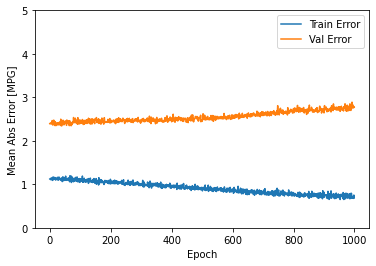

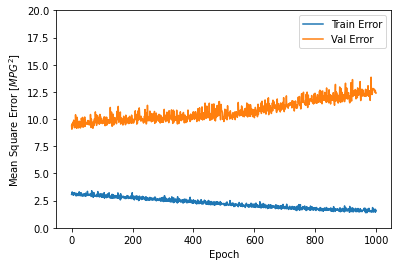

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'])
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'])
    plt.ylim([0,5])
    plt.legend(['Train Error', 'Val Error'])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'])
    plt.plot(hist['epoch'], hist['val_mean_squared_error'])
    plt.ylim([0,20])
    plt.legend(['Train Error', 'Val Error'])
    
    plt.show()

    
plot_history(history)

In [23]:
model = build_model()

C:\Users\nooor\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)        # تانيه epochs واللي لما يبقي الق مايمكن اقف علي كدا متعملش  val_loss معين وخلي عينك علي  epochs كأني بقوله اقف عند عدد 

In [25]:
history = model.fit(normed_x_train, y_train, epochs=1000, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


................................................

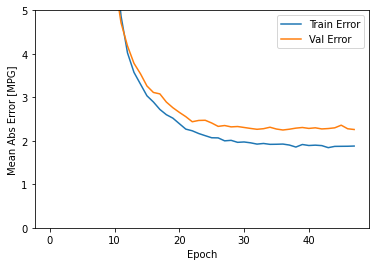

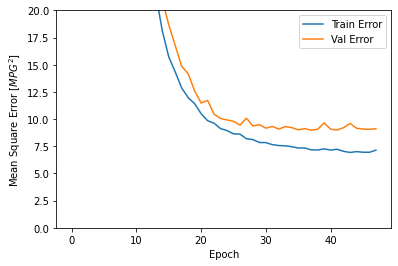

In [26]:
plot_history(history)

In [27]:
loss, mae, mse = model.evaluate(normed_x_test, y_test, verbose=0)
print('Testing loss function: ', loss)
print('Testing set Mean Abs Error: ', mae)
print('Testing set Mean Square Error: ', mse)

Testing loss function:  5.988702297210693
Testing set Mean Abs Error:  1.9121848344802856
Testing set Mean Square Error:  5.988702297210693


In [28]:
predictions = model.predict(normed_x_test).flatten()

(0.0, 48.552368574142456)

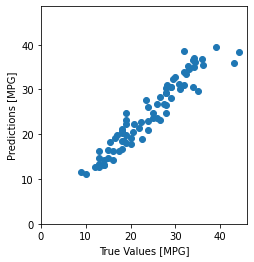

In [29]:
# compare between actual(y_test) & predicted --> must actual before predicted
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

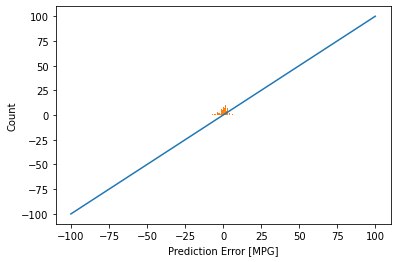

In [30]:
_ = plt.plot([-100, 100], [-100, 100])
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")